# Import Package & Data

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import skfuzzy as fuzz

from sklearn.preprocessing import RobustScaler, FunctionTransformer, PowerTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.8f}'.format)

In [29]:
df = pd.read_csv('data/clean_data.csv')
df.head(10)

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,Brxndoon7-LK#4002715,684,27011,1.06674302,18,177,10,110,98332,1366,5113,2.32312925,588,6063,305319,3932335,255.67203514,403651,25321
1,bdooory_ab#7095171,4,162,0.63281250,4,6,2,0,568,8,35,2.00000000,4,68,4836,24485,265.50000000,5404,256
2,ahevepluto#3505304,186,1898,0.56962785,13,37,7,2,5111,550,485,3.66666667,150,488,39978,458269,180.37963636,45089,3332
3,MilkyLemonz-_-#5981249,741,21803,1.03665843,26,185,29,111,81361,2442,3894,2.82638889,864,4029,327230,4269370,198.84422604,408591,21032
4,RPDUNKduo#8122914,26,349,0.44402036,7,12,4,0,996,44,40,2.93333333,15,138,4844,72765,253.67727273,5840,786
5,CzarnyDelfinek#9059572,188,1949,1.49577897,22,53,4,57,3333,409,536,16.36000000,25,150,10511,909543,38.63031785,13844,1303
6,SanDrasoSa,15,132,0.63157895,7,5,4,0,549,21,25,3.50000000,6,31,3153,18430,199.74285714,3702,209
7,DrunkUnc92#7705654,207,3452,0.69779664,10,40,9,110,16134,378,535,2.93023256,129,811,104881,530615,266.01428571,121015,4947
8,whoshotghost#1916366,106,3284,0.94612504,17,41,11,12,11772,255,501,1.99218750,128,532,49715,543830,278.64470588,61487,3471
9,Nsory_1#5583298,1592,15033,0.78032702,17,156,13,111,49680,3247,2367,3.05456256,1063,2099,247686,3018769,230.43030490,297366,19265


# Data Preparation

In [30]:
kolom = ['kills', 'kdRatio', 'killstreak', 'hits', 'headshots', 'misses', 'deaths', 'scorePerMinute', 'shots']
column_indexes = np.arange(0, 8)

def calculate(data):

    data['hits'] = data['hits'] / data['shots']
    data['misses'] = data['misses'] / data['shots']
    data['headshots'] = data['headshots'] / data['shots']
    
    data.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    data.drop(columns=['shots'], inplace=True)

    return data

kolom_calculate = ColumnTransformer(transformers=[('ratio_transform', FunctionTransformer(func=calculate, validate=False), kolom)], remainder='passthrough')

# Pemodelan
**Menggunakan Algoritma K-Means**

In [31]:
kmeans = KMeans(n_clusters=3, max_iter=500, n_init=50, random_state=42)

model_kmeans = Pipeline([
    ('kolom_calculate', kolom_calculate),
    ('normalisasi', ColumnTransformer(transformers=[('normalisasi', RobustScaler(), column_indexes)])),
    ('transformasi', ColumnTransformer(transformers=[('transformasi', PowerTransformer(method='yeo-johnson'), column_indexes)])),
    ('algoritma', kmeans)
])

X = df[kolom]

data = model_kmeans[:-1].fit_transform(X)
member = model_kmeans.fit_predict(X)

silhouette_avg = silhouette_score(data, member)
ch_index_score = calinski_harabasz_score(data, member)

print(f'CH Index Score\t: {ch_index_score}')
print(f'Silhoutte Score\t: {silhouette_avg}')

CH Index Score	: 404.87975612365193
Silhoutte Score	: 0.2719533205223927


In [32]:
df_kmeans = df.copy()
df_kmeans['Cluster'] = kmeans.labels_
df_kmeans.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Cluster
0,Brxndoon7-LK#4002715,684,27011,1.06674302,18,177,10,110,98332,1366,5113,2.32312925,588,6063,305319,3932335,255.67203514,403651,25321,1
1,bdooory_ab#7095171,4,162,0.63281250,4,6,2,0,568,8,35,2.00000000,4,68,4836,24485,265.50000000,5404,256,0
2,ahevepluto#3505304,186,1898,0.56962785,13,37,7,2,5111,550,485,3.66666667,150,488,39978,458269,180.37963636,45089,3332,2
3,MilkyLemonz-_-#5981249,741,21803,1.03665843,26,185,29,111,81361,2442,3894,2.82638889,864,4029,327230,4269370,198.84422604,408591,21032,1
4,RPDUNKduo#8122914,26,349,0.44402036,7,12,4,0,996,44,40,2.93333333,15,138,4844,72765,253.67727273,5840,786,2


In [33]:
df_kmeans['Cluster'].value_counts()

2    398
1    395
0    165
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

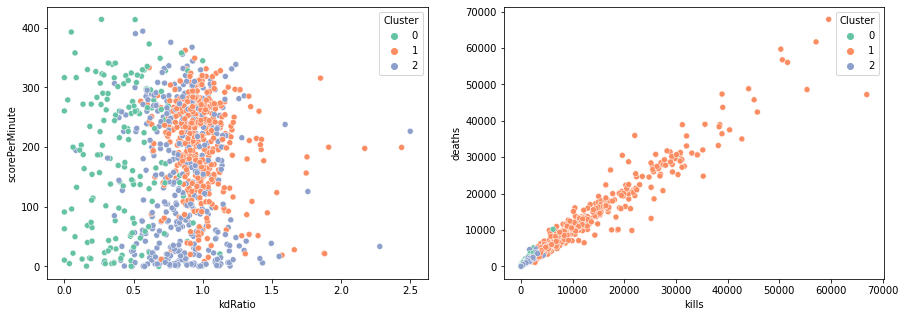

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_kmeans, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_kmeans, palette='Set2', ax=ax[1])

### Prediksi Menggunakan Data Baru

In [35]:
data = pd.DataFrame({
    'name': ['Brxndoon7-LK#4002715', 'ahevepluto#3505304'],
    'wins': [684, 186],
    'kills': [27011, 1898],
    'kdRatio': [1.06674302, 0.56962785],
    'killstreak': [18, 13],
    'level': [177, 37],
    'losses': [10, 7],
    'prestige': [110, 2],
    'hits': [98332, 5111],
    'timePlayed': [1366, 550],
    'headshots': [5113, 485],
    'averageTime': [2.32312925, 3.66666667],
    'gamesPlayed': [588, 150],
    'assists': [6063, 488],
    'misses': [305319, 39978],
    'xp': [3932335, 458269],
    'scorePerMinute': [255.67203514, 180.37963636],
    'shots': [403651, 45089],
    'deaths': [25321, 3332]
})

cluster_prediksi = model_kmeans.predict(data)
print(cluster_prediksi)

[1 2]


# Pemodelan
**Menggunakan Algoritma Agglomerative Clustering**

In [36]:
agglomerative = AgglomerativeClustering(n_clusters=3)

model_agglomerative = Pipeline([
    ('kolom_calculate', kolom_calculate),
    ('normalisasi', ColumnTransformer(transformers=[('normalisasi', RobustScaler(), column_indexes)])),
    ('transformasi', ColumnTransformer(transformers=[('transformasi', PowerTransformer(method='yeo-johnson'), column_indexes)])),
    ('algoritma', agglomerative)
])

X = df[kolom]

data = model_agglomerative[:-1].fit_transform(X)
member = model_agglomerative.fit_predict(X)

silhouette_avg = silhouette_score(data, member)
ch_index_score = calinski_harabasz_score(data, member)

print(f'CH Index Score\t: {ch_index_score}')
print(f'Silhoutte Score\t: {silhouette_avg}')

CH Index Score	: 333.6545611107795
Silhoutte Score	: 0.22700479280330996


In [37]:
df_agglomerative = df.copy()
df_agglomerative['Cluster'] = agglomerative.labels_
df_agglomerative.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Cluster
0,Brxndoon7-LK#4002715,684,27011,1.06674302,18,177,10,110,98332,1366,5113,2.32312925,588,6063,305319,3932335,255.67203514,403651,25321,2
1,bdooory_ab#7095171,4,162,0.63281250,4,6,2,0,568,8,35,2.00000000,4,68,4836,24485,265.50000000,5404,256,0
2,ahevepluto#3505304,186,1898,0.56962785,13,37,7,2,5111,550,485,3.66666667,150,488,39978,458269,180.37963636,45089,3332,0
3,MilkyLemonz-_-#5981249,741,21803,1.03665843,26,185,29,111,81361,2442,3894,2.82638889,864,4029,327230,4269370,198.84422604,408591,21032,2
4,RPDUNKduo#8122914,26,349,0.44402036,7,12,4,0,996,44,40,2.93333333,15,138,4844,72765,253.67727273,5840,786,1


In [38]:
df_agglomerative['Cluster'].value_counts()

2    366
1    348
0    244
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

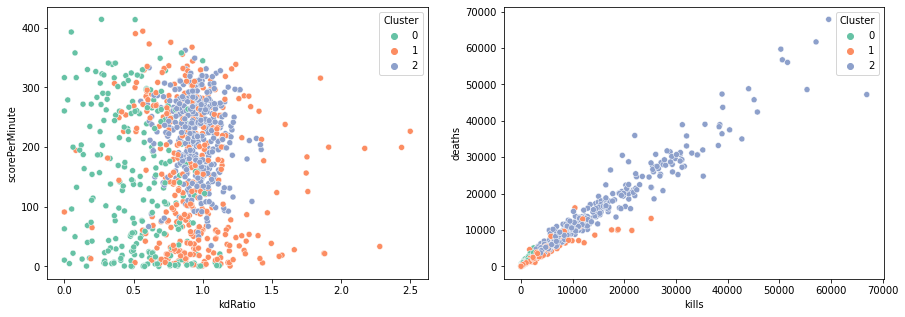

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_agglomerative, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_agglomerative, palette='Set2', ax=ax[1])

# Pemodelan
**Menggunakan Algoritma Fuzzy C-Means**

In [40]:
preprocessor = Pipeline([
    ('kolom_calculate', kolom_calculate),
    ('normalisasi', ColumnTransformer(transformers=[('normalisasi', RobustScaler(), column_indexes)])),
    ('transformasi', ColumnTransformer(transformers=[('transformasi', PowerTransformer(method='yeo-johnson'), column_indexes)])),
])

X = df[kolom]
data = preprocessor.fit_transform(X) 

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, c=3, m=2.0, error=0.005, maxiter=1000, init=None, seed=42)

member = np.argmax(u, axis=0)

silhouette_avg = silhouette_score(data, member)
ch_index_score = calinski_harabasz_score(data, member)

print(f'CH Index Score\t: {ch_index_score}')
print(f'Silhoutte Score\t: {silhouette_avg}')
print(f'FPC Score\t: {fpc}')

CH Index Score	: 396.5614526169247
Silhoutte Score	: 0.25655343298179456
FPC Score	: 0.4970281247460892


In [41]:
df_fuzzy = df.copy()
df_fuzzy['Cluster'] = member
df_fuzzy.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Cluster
0,Brxndoon7-LK#4002715,684,27011,1.06674302,18,177,10,110,98332,1366,5113,2.32312925,588,6063,305319,3932335,255.67203514,403651,25321,2
1,bdooory_ab#7095171,4,162,0.63281250,4,6,2,0,568,8,35,2.00000000,4,68,4836,24485,265.50000000,5404,256,1
2,ahevepluto#3505304,186,1898,0.56962785,13,37,7,2,5111,550,485,3.66666667,150,488,39978,458269,180.37963636,45089,3332,1
3,MilkyLemonz-_-#5981249,741,21803,1.03665843,26,185,29,111,81361,2442,3894,2.82638889,864,4029,327230,4269370,198.84422604,408591,21032,2
4,RPDUNKduo#8122914,26,349,0.44402036,7,12,4,0,996,44,40,2.93333333,15,138,4844,72765,253.67727273,5840,786,1


In [42]:
df_fuzzy['Cluster'].value_counts()

2    379
0    345
1    234
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

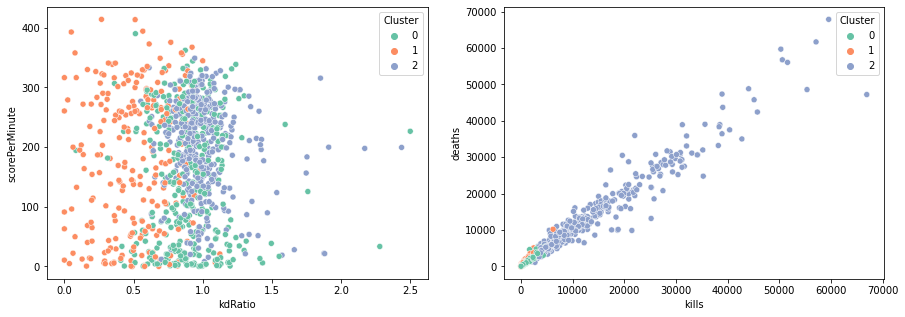

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_fuzzy, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_fuzzy, palette='Set2', ax=ax[1])

### Prediksi Menggunakan Data Baru

In [44]:
data = pd.DataFrame({
    'name': ['Brxndoon7-LK#4002715', 'ahevepluto#3505304'],
    'wins': [684, 186],
    'kills': [27011, 1898],
    'kdRatio': [1.06674302, 0.56962785],
    'killstreak': [18, 13],
    'level': [177, 37],
    'losses': [10, 7],
    'prestige': [110, 2],
    'hits': [98332, 5111],
    'timePlayed': [1366, 550],
    'headshots': [5113, 485],
    'averageTime': [2.32312925, 3.66666667],
    'gamesPlayed': [588, 150],
    'assists': [6063, 488],
    'misses': [305319, 39978],
    'xp': [3932335, 458269],
    'scorePerMinute': [255.67203514, 180.37963636],
    'shots': [403651, 45089],
    'deaths': [25321, 3332]
})

new_data = preprocessor.fit_transform(data)
u_baru, _, _, _, _, _ = fuzz.cluster.cmeans_predict(new_data.T, cntr, 2, error=0.005, maxiter=1000)
cluster_prediksi = np.argmax(u_baru, axis=0)

print(cluster_prediksi)

[2 1]


# Pemodelan
**Menggunakan Algoritma Gaussian Mixture**

In [45]:
gaussian = GaussianMixture(n_components=3, max_iter=500, n_init=50, random_state=42)

model_gaussian = Pipeline([
    ('kolom_calculate', kolom_calculate),
    ('normalisasi', ColumnTransformer(transformers=[('normalisasi', RobustScaler(), column_indexes)])),
    ('transformasi', ColumnTransformer(transformers=[('transformasi', PowerTransformer(method='yeo-johnson'), column_indexes)])),
    ('algoritma', gaussian)
])

X = df[kolom]

data = model_gaussian[:-1].fit_transform(X)
member = model_gaussian.fit_predict(X)

silhouette_avg = silhouette_score(data, member)
ch_index_score = calinski_harabasz_score(data, member)

print(f'CH Index Score\t: {ch_index_score}')
print(f'Silhoutte Score\t: {silhouette_avg}')

CH Index Score	: 159.23691577617524
Silhoutte Score	: 0.029274881894387712


In [46]:
df_gaussian = df.copy()
df_gaussian['Cluster'] = member
df_gaussian.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Cluster
0,Brxndoon7-LK#4002715,684,27011,1.06674302,18,177,10,110,98332,1366,5113,2.32312925,588,6063,305319,3932335,255.67203514,403651,25321,2
1,bdooory_ab#7095171,4,162,0.63281250,4,6,2,0,568,8,35,2.00000000,4,68,4836,24485,265.50000000,5404,256,0
2,ahevepluto#3505304,186,1898,0.56962785,13,37,7,2,5111,550,485,3.66666667,150,488,39978,458269,180.37963636,45089,3332,2
3,MilkyLemonz-_-#5981249,741,21803,1.03665843,26,185,29,111,81361,2442,3894,2.82638889,864,4029,327230,4269370,198.84422604,408591,21032,2
4,RPDUNKduo#8122914,26,349,0.44402036,7,12,4,0,996,44,40,2.93333333,15,138,4844,72765,253.67727273,5840,786,2


In [47]:
df_gaussian['Cluster'].value_counts()

2    469
0    270
1    219
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='deaths'>

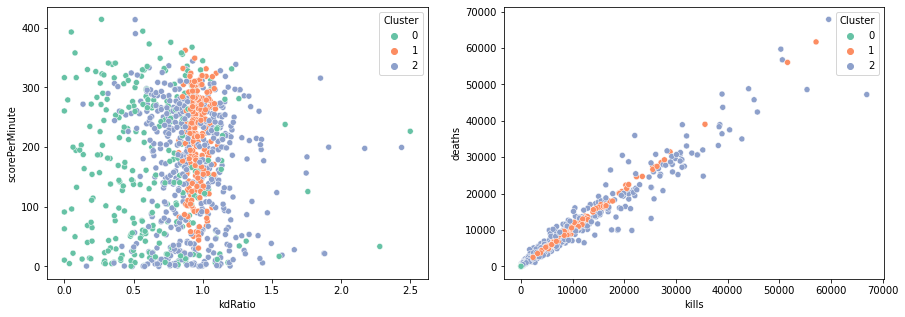

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='kdRatio', y='scorePerMinute', hue='Cluster', data=df_gaussian, palette='Set2', ax=ax[0])
sns.scatterplot(x='kills', y='deaths', hue='Cluster', data=df_gaussian, palette='Set2', ax=ax[1])

### Prediksi Menggunakan Data Baru

In [49]:
data = pd.DataFrame({
    'name': ['Brxndoon7-LK#4002715', 'ahevepluto#3505304'],
    'wins': [684, 186],
    'kills': [27011, 1898],
    'kdRatio': [1.06674302, 0.56962785],
    'killstreak': [18, 13],
    'level': [177, 37],
    'losses': [10, 7],
    'prestige': [110, 2],
    'hits': [98332, 5111],
    'timePlayed': [1366, 550],
    'headshots': [5113, 485],
    'averageTime': [2.32312925, 3.66666667],
    'gamesPlayed': [588, 150],
    'assists': [6063, 488],
    'misses': [305319, 39978],
    'xp': [3932335, 458269],
    'scorePerMinute': [255.67203514, 180.37963636],
    'shots': [403651, 45089],
    'deaths': [25321, 3332]
})

cluster_prediksi = model_gaussian.predict(data)
print(cluster_prediksi)

[2 2]


# Analisis

In [50]:
kolom.remove('shots')

**Pengelompokkan berdasarkan kolom**<br>
['kills', 'kdRatio', 'killstreak', 'hits', 'headshots', 'misses', 'deaths', 'scorePerMinute']<br><br>

### Algoritma K-Means

In [51]:
group_1 = df_kmeans[kolom + ['Cluster', 'level']].groupby('Cluster').mean()
group_2 = df_kmeans.groupby('Cluster').size().reset_index(name="Count")
pd.merge(group_2, group_1, on="Cluster")

,Cluster,Count,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute,level
0,0,165,273.07272727,0.42290767,3.83030303,730.38181818,43.29696970,6432.98181818,488.98181818,181.65337590,8.87878788
1,1,395,13529.90886076,0.99817909,16.84810127,37647.38481013,2253.32151899,163899.20253165,13734.41772152,199.60220149,132.92405063
2,2,398,1084.63819095,0.86889224,8.68341709,2771.87437186,200.96482412,12221.27386935,1245.67336683,148.66854318,31.09547739


**Beginner > Intermediate > Expert**

- **Cluster 0** => Beginner Player
- **Cluster 1** => Expert Player
- **Cluster 2** => Intermediate Player

### Algoritma Agglomerative Clustering

In [52]:
group_1 = df_agglomerative[kolom + ['Cluster', 'level']].groupby('Cluster').mean()
group_2 = df_agglomerative.groupby('Cluster').size().reset_index(name="Count")
pd.merge(group_2, group_1, on="Cluster")

,Cluster,Count,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute,level
0,0,244,440.02049180,0.53148691,4.76229508,852.56557377,75.09836066,6364.93032787,665.40163934,143.34205992,17.05327869
1,1,348,2043.17816092,0.94816925,9.97126437,4548.67528736,389.95402299,18758.37356322,1934.02011494,154.22026754,47.59770115
2,2,366,13668.48633880,0.95692326,16.69672131,39080.52185792,2249.07650273,170996.54918033,14115.18579235,216.78044009,124.64754098


**Beginner > Intermediate > Expert**

- **Cluster 0** => Beginner Player
- **Cluster 1** => Intermediate Player
- **Cluster 2** => Expert Player

### Algoritma Fuzzy C-Means

In [53]:
group_1 = df_fuzzy[kolom + ['Cluster', 'level']].groupby('Cluster').mean()
group_2 = df_fuzzy.groupby('Cluster').size().reset_index(name="Count")
pd.merge(group_2, group_1, on="Cluster")

,Cluster,Count,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute,level
0,0,345,1288.69275362,0.90346699,9.24637681,3407.29275362,238.95652174,14625.07246377,1445.60869565,147.12330135,34.24927536
1,1,234,357.47863248,0.50635355,4.68803419,958.41880342,59.26923077,7454.62820513,580.27777778,178.98564385,11.61538462
2,2,379,13965.19261214,1.00183846,17.03430079,38772.16358839,2324.22427441,168537.36411609,14161.04221636,198.80099518,136.70712401


**Beginner > Intermediate > Expert**

- **Cluster 0** => Intermediate Player
- **Cluster 1** => Beginner Player
- **Cluster 2** => Expert Player

### Algoritma Gaussian Mixture

In [54]:
group_1 = df_gaussian[kolom + ['Cluster', 'level']].groupby('Cluster').mean()
group_2 = df_gaussian.groupby('Cluster').size().reset_index(name="Count")
pd.merge(group_2, group_1, on="Cluster")

,Cluster,Count,kills,kdRatio,killstreak,hits,headshots,misses,deaths,scorePerMinute,level
0,0,270,106.20740741,0.61554202,4.78888889,324.51481481,18.49629630,1789.21111111,156.61481481,167.64302998,6.00740741
1,1,219,8485.57534247,0.95773263,13.78082192,24937.57990868,1444.76255708,107394.17808219,8953.10502283,209.16749846,91.98173516
2,2,469,8388.14498934,0.92524484,13.71428571,22485.04690832,1398.27931770,99495.27078891,8525.66950959,163.99670904,95.05330490


**Beginner > Intermediate > Expert**

- **Cluster 0** => Beginner Player
- **Cluster 1** => Expert Player
- **Cluster 2** => Intermediate Player